In [1]:
import os,sys,re,time,math


from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from keras.callbacks import EarlyStopping



import matplotlib as mpl
import numpy as np
import pandas as pd

import sklearn
from matplotlib import pyplot as plt


from keras import backend as K

from keras.optimizers import Adam
from keras.models import *
from keras.layers import *
from keras.utils.np_utils import to_categorical

from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
 

#指定第一块GPU可用 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
config = tf.ConfigProto() 
#不全部占满显存, 按需分配
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

KTF.set_session(sess)

In [3]:
def read_svm(file):
    encodings = []
    labels = []
    with open(file) as f:
        records = f.readlines()

    for line in records:
        line = re.sub('\d+:', '', line)
        array = line.strip().split() if line.strip() != '' else None
        encodings.append(array[1:])
        labels.append(int(array[0]))

    return np.array(encodings).astype(float), np.array(labels).astype(int)

In [4]:
def performance(labelArr, predictArr):
    #labelArr[i] is actual value,predictArr[i] is predict value
    TP = 0.; TN = 0.; FP = 0.; FN = 0.
    for i in range(len(labelArr)):
        if labelArr[i] == 1 and predictArr[i] == 1:
            TP += 1.
        if labelArr[i] == 1 and predictArr[i] == 0:
            FN += 1.
        if labelArr[i] == 0 and predictArr[i] == 1:
            FP += 1.
        if labelArr[i] == 0 and predictArr[i] == 0:
            TN += 1.
    if (TP + FN)==0:
        SN=0
    else:
        SN = TP/(TP + FN) #Sensitivity = TP/P  and P = TP + FN
    if (FP+TN)==0:
        SP=0
    else:
        SP = TN/(FP + TN) #Specificity = TN/N  and N = TN + FP
    if (TP+FP)==0:
        precision=0
    else:
        precision=TP/(TP+FP)
    if (TP+FN)==0:
        recall=0
    else:
        recall=TP/(TP+FN)
    GM=math.sqrt(recall*SP)
    #MCC = (TP*TN-FP*FN)/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))
    return precision,recall,SN,SP,GM,TP,TN,FP,FN

In [5]:
# 分割并序列编码
AA = 'GAVLIFWYDNEKQMSTCPHR'
def pep(path, seq_len):
    seqs = open(path).readlines()
    cut = (len(seqs[0].split()[0]) - 1 - seq_len) // 2
    X = [[AA.index(res.upper()) if res.upper() in AA else 0
          for res in (seq.split()[0][cut:-cut] if cut != 0 else seq.split()[0])]
        for seq in seqs if seq.strip() != '']
    y = [int(seq.split()[-1]) for seq in seqs if seq.strip() != '']
    return np.array(X), np.array(y)


In [6]:
def create_cnn_model3(shape, dropout=0.4):
    model = Sequential()

    model.add(Conv1D(128, 8,input_shape=shape))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


In [7]:
def create_cnn_model5(input_length=29,dropout=0.4):
    model = Sequential()
    model.add(Embedding(21, 5, input_length = input_length))
    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


In [7]:
name = 'EAAC'
gap = '_gap5'
#q = [21,23,25]
#q = [21,23,25,27,29,31,35,37]
q=[29]
for t in q :
    path_train = 'C:/Users/Crow/Desktop/human_data_12.12/Step_11_CV/'+ name +'/Train_'+str(t)+'_'+ name + gap +'.txt'
    path_test = 'C:/Users/Crow/Desktop/human_data_12.12/Step_11_IND/'+ name +'/Test_'+str(t)+'_'+ name + gap +'.txt'
    train = read_svm(path_train)
    test = read_svm(path_test)


    x_train = train[0]
    y_train = train[1]

    x_test = test[0]
    y_test = test[1]
    x_train = np.expand_dims(x_train, axis=2) 
    x_test = np.expand_dims(x_test, axis=2) 
    shape = x_train.shape[1:]

KeyboardInterrupt: 

In [8]:
x_train.shape

NameError: name 'x_train' is not defined

In [9]:

model = create_cnn_model3(shape=shape)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 493, 128)          1152      
_________________________________________________________________
activation_1 (Activation)    (None, 493, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 246, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 246, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 246, 128)          131200    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 123, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 123, 128)          0         
__________

In [13]:
model = create_cnn_model3(shape=shape)
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stopping]
#model.fit(x_train, y_train, epochs = 20, batch_size = 256,callbacks=callbacks_list, verbose=1)
model.fit(x_train, y_train, epochs = 20,batch_size = 256,validation_split = 0.2,callbacks=callbacks_list, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 493, 128)          1152      
_________________________________________________________________
activation_3 (Activation)    (None, 493, 128)          0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 246, 128)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 246, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 246, 128)          131200    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 123, 128)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 123, 128)          0         
__________

In [14]:
print(model.evaluate(x_test, y_test, batch_size=256))
pre = model.predict(x_test)
pre2 = model.predict_classes(x_test)
fpr, tpr, thresholds = roc_curve(y_test,pre,pos_label=1)
print(sklearn.metrics.auc(fpr, tpr))
_,_,SN,SP,_,_,_,_,_ = performance(y_test,pre2)
print("ACC:  %f "  %accuracy_score(y_test,pre2))
print("Sn: %f" %SN)
print("Sp: %f" %SP)
print("MCC: %f " %matthews_corrcoef(y_test,pre2))
print("AUC: %f" % auc(fpr, tpr))

17980/17980 [==============================] - 1s 36us/step
[0.2651589788256153, 0.9165183537263626]
0.7307765473286771
ACC:  0.916518 
Sn: 0.009440
Sp: 0.998060
MCC: 0.040846 
AUC: 0.730777


In [15]:
data = model.layers[0].get_weights()[0]

In [16]:
data.shape

(8, 1, 128)

In [17]:
model.layers[1]

In [18]:
layer_1 = K.function([model.layers[0].input], [model.layers[0].output])#第一个 model.layers[0],不修改,表示输入数据；第二个model.layers[you wanted],修改为你需要输出的层数的编号


In [19]:
layer_1.inputs

[<tf.Tensor 'conv1d_7_input:0' shape=(?, 500, 1) dtype=float32>]

In [20]:
out = model.layers[0].output

In [21]:
out.shape

TensorShape([Dimension(None), Dimension(493), Dimension(128)])

In [22]:
layer1_model = Model(inputs=model.layers[0].input,outputs=model.get_layer('conv1d_8').output)

In [23]:
layer1_model.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x000001B485FFC438>>

In [24]:
layer1_model = Model(inputs=model.layers[0].input,outputs=model.get_layer('conv1d_8').output)
layer1_model_output = layer1_model.predict(x_train)

In [25]:
layer1_model_output.shape

(73793, 246, 128)

In [ ]:
# 二维 -> 三维
x_train = np.expand_dims(x_train, axis=2) 
x_test = np.expand_dims(x_test, axis=2) 

In [24]:
train = read_svm(path_train)
test = read_svm(path_test)


x_train = train[0]
y_train = train[1]

x_test = test[0]
y_test = test[1]


In [23]:
x_test.shape

(17980, 500, 1)

In [12]:
x_train = x_train.reshape(73793,25,20)
x_test = x_test.reshape(17980,25,20)

In [34]:
x_train = x_train.reshape(73793,25,20)
x_test = x_test.reshape(17980,25,20)



In [21]:
x_train = np.expand_dims(x_train, axis=2) 
x_test = np.expand_dims(x_test, axis=2) 

In [22]:
model = create_cnn_model3(shape=(29,22))
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stopping]
#model.fit(x_train, y_train, epochs = 20, batch_size = 256,callbacks=callbacks_list, verbose=1)
model.fit(x_train, y_train, epochs = 20,batch_size = 256,validation_split = 0.2,callbacks=callbacks_list, verbose=1, shuffle=True)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 29, 128)           22656     
_________________________________________________________________
activation_6 (Activation)    (None, 29, 128)           0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 14, 128)           0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 128)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 14, 128)           131200    
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 7, 128)            0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 128)            0         
__________

ValueError: Error when checking input: expected conv1d_16_input to have shape (29, 22) but got array with shape (500, 1)

In [9]:
def create_cnn_model3(shape, dropout=0.4):
    model = Sequential()

    model.add(Conv1D(128, 8,input_shape=shape, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


In [15]:
model = create_cnn_model3(shape=x_train.shape[1:])
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list = [early_stopping]
#model.fit(x_train, y_train, epochs = 20, batch_size = 256,callbacks=callbacks_list, verbose=1)
model.fit(x_train, y_train, epochs = 20,batch_size = 256,validation_split = 0.2,callbacks=callbacks_list, verbose=1, shuffle=True)


print(model.evaluate(x_test, y_test, batch_size=256))
pre = model.predict(x_test)
pre2 = model.predict_classes(x_test)
fpr, tpr, thresholds = roc_curve(y_test,pre,pos_label=1)
print(sklearn.metrics.auc(fpr, tpr))
_,_,SN,SP,_,_,_,_,_ = performance(y_test,pre2)
print("ACC:  %f "  %accuracy_score(y_test,pre2))
print("Sn: %f" %SN) 
print("Sp: %f" %SP)
print("MCC: %f " %matthews_corrcoef(y_test,pre2))
print("AUC: %f" % auc(fpr, tpr))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 25, 128)           20608     
_________________________________________________________________
activation_3 (Activation)    (None, 25, 128)           0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 12, 128)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 128)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 12, 128)           131200    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 6, 128)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 128)            0         
__________

In [20]:
layer1_model_output2 = layer1_model_output.reshape(73793,493)

ValueError: cannot reshape array of size 4656633472 into shape (73793,493)

In [ ]:
layer1_model_output2.shape

In [ ]:
len(layer1_model_output2[1])

In [ ]:
fw = open('C:/Users/Crow/Desktop/human_data_12.12/layer1_model_output2.txt', 'w')

for i in range(0,len(layer1_model_output2)):
    for j in range(0,len(layer1_model_output2[i])):
        fw.write(str(layer1_model_output2[i][j]))
        fw.write('\t')
        if j == 63104:
            fw.write('\n')

In [ ]:
layer1_model_output.shape

In [ ]:
len(layer_outs)

In [ ]:

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functors = [K.function([inp]+ [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

# Testing
test = np.random.random(input_shape)[np.newaxis,...]
layer_outs = [func([test, 1.]) for func in functors]
print layer_outs

In [ ]:
data = train[0]

In [ ]:
data.reshape(73793,)

In [ ]:
data.transpose((1,0,2)) [0][1][2] 

In [10]:
# world embedding 提取cnn第一层
def create_cnn_model5(input_length=29,dropout=0.4):
    model = Sequential()
    model.add(Embedding(21, 5, input_length = input_length))
    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Conv1D(128, 8, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


In [30]:
model.save('C:/Users/Crow/Desktop/human_data_12.12/model.h5')

In [11]:
# world embedding sliding windows
# keras 编码循环输出result
name = 'Embedding'


path_train = 'C:/Users/Crow/Desktop/human_data_12.12/Train.txt'
path_test =  'C:/Users/Crow/Desktop/human_data_12.12/Independent.txt'

x_train,y_train = pep(path_train,27)
x_test,y_test = pep(path_test,27)


    
   

In [12]:
x_test[0]

array([ 4, 15,  9,  9, 14, 14, 11, 15, 19,  1,  1,  7,  1, 10, 11,  3, 19,
       19,  3,  0,  5,  0,  0, 17,  1,  0, 17,  0,  1])

In [69]:
AA = 'GAVLIFWYDNEKQMSTCPHR'
path = path_train
seq_len = 29
seqs = open(path).readlines()
cut = (len(seqs[0].split()[0]) - 1 - seq_len) // 2
X = [[AA.index(res.upper()) if res.upper() in AA else 0
      for res in (seq.split()[0][cut:-cut] if cut != 0 else seq.split()[0])]
    for seq in seqs if seq.strip() != '']
y = [int(seq.split()[-1]) for seq in seqs if seq.strip() != '']
xxx=np.array(X)
yyy=np.array(y)

In [90]:
'acd'.strip()


'acd'

In [83]:
len(seqs[0].split()[0]) - 1 - seq_len//2

36

In [10]:
x_train.shape

(73793, 29)

In [12]:
model = create_cnn_model5(input_length=29,dropout=0.6)
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
callbacks_list = [early_stopping]
#model.fit(x_train, y_train, epochs = 20, batch_size = 256,callbacks=callbacks_list, verbose=1)
model.fit(x_train, y_train, epochs = 500,batch_size = 256,validation_split = 0.2,callbacks=callbacks_list, verbose=1, shuffle=True)


print(model.evaluate(x_test, y_test, batch_size=256))
pre = model.predict(x_test)
pre2 = model.predict_classes(x_test)
fpr, tpr, thresholds = roc_curve(y_test, pre,pos_label=1)
print(sklearn.metrics.auc(fpr, tpr))
_,_,SN,SP,_,_,_,_,_ = performance(y_test,pre2)
print("ACC:  %f "  %accuracy_score(y_test,pre2))
print("Sn: %f" %SN) 
print("Sp: %f" %SP)
print("MCC: %f " %matthews_corrcoef(y_test,pre2))
print("AUC: %f" % auc(fpr, tpr))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 29, 5)             105       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 29, 128)           5248      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 14, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 14, 128)           131200    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 128)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 128)            0         
__________

In [13]:
model_load = load_model('C:/Users/Crow/Desktop/zym论文/model/29_kfold_CNN_Embedding_9.hdf5')

In [14]:
model_load.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 29, 5)             105       
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 29, 128)           5248      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 14, 128)           0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 14, 128)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 14, 128)           131200    
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 7, 128)            0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 7, 128)            0         
__________

In [22]:
# 提取合并层输出， 使用t-SNE展示效果
layer1_model_load = Model(inputs=model_load.layers[0].input,outputs=model_load.get_layer('flatten_13').output)
layer1_model_load.summary()
layer1_model_loadl_output = layer1_model_load.predict(x_test)

layer1_model_loadl_output.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13_input (InputLay (None, 29)                0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 29, 5)             105       
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 29, 128)           5248      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 14, 128)           0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 14, 128)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 14, 128)           131200    
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 7, 128)            0         
__________

(17980, 384)

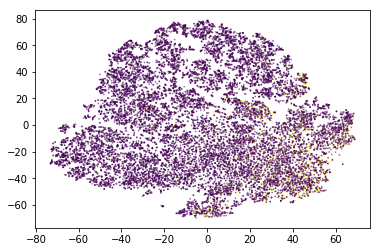

In [25]:
from sklearn.manifold import TSNE 

#tsne = TSNE(n_components=2, init='pca', random_state=501)
tsne = TSNE(n_components=2, init='random', random_state=501)

X_tsne = tsne.fit_transform(layer1_model_loadl_output)

plt.figure()
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_test, s=0.5, alpha = 0.5)
plt.savefig('C:/Users/Crow/Desktop/Embedding_test_random_after-merge_t-SNE_600.png', dpi=600)

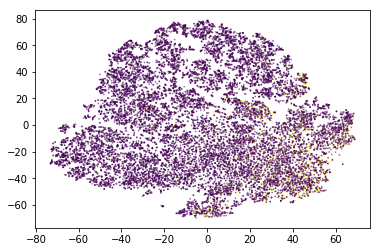

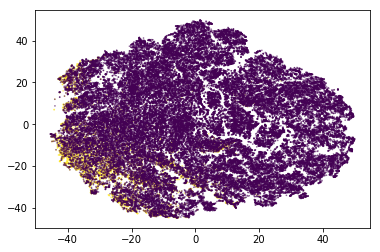

In [21]:
model_load.layers[1]

In [33]:
layer1_model_load = Model(inputs=model_load.layers[0].input,outputs=model_load.get_layer('conv1d_37').output)
layer1_model_load.summary()
layer1_model_loadl_output = layer1_model_load.predict(x_train)

layer1_model_loadl_output.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13_input (InputLay (None, 29)                0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 29, 5)             105       
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 29, 128)           5248      
Total params: 5,353
Trainable params: 5,353
Non-trainable params: 0
_________________________________________________________________


(73793, 29, 128)

In [34]:
layer1_model_loadl_output_new = layer1_model_loadl_output.reshape(73793,3712)
layer1_model_loadl_output_new.shape

(73793, 3712)

In [35]:

fw = open('C:/Users/Crow/Desktop/layer1_model_loadl_output_new.txt', 'w')

for i in range(0,len(layer1_model_loadl_output_new)):
    for j in range(0,len(layer1_model_loadl_output_new[i])):
        fw.write(str(layer1_model_loadl_output_new[i][j]))
        fw.write('\t')
    fw.write('\n')
fw.close()

In [39]:
# 测试
a = np.array([1,2,3,4,5,6,7,8])  #一维数组
print(a.shape[0])  #值为8，因为有8个数据
# print(a.shape[1])  #IndexError: tuple index out of range

a = np.array([[1,2,3,4],[5,6,7,8]])  #二维数组
print(a.shape[0])  #值为2，最外层矩阵有2个元素，2个元素还是矩阵。
print(a.shape[1])  #值为4，内层矩阵有4个元素。
print(a.shape[2])  #IndexError: tuple index out of range

8
2
4


IndexError: tuple index out of range

In [54]:
layer1_model_loadl_output.shape

(29, 128)

In [31]:
layer1_model = Model(inputs=model.layers[0].input,outputs=model.get_layer('conv1d_10').output)


In [32]:
layer1_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1_input (InputLaye (None, 29)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 29, 5)             105       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 29, 128)           5248      
Total params: 5,353
Trainable params: 5,353
Non-trainable params: 0
_________________________________________________________________


In [33]:
layer1_model_output = layer1_model.predict(x_train)

In [34]:
layer1_model_output.shape

(73793, 29, 128)

In [35]:
layer1_model_output_new = layer1_model_output.reshape(73793,3712)

In [36]:
layer1_model_output_new.shape

(73793, 3712)

In [37]:
len(layer1_model_output_new)

73793

In [38]:
layer1_model_output_new[0][3712]

IndexError: index 3712 is out of bounds for axis 0 with size 3712

In [26]:
fw = open('C:/Users/Crow/Desktop/human_data_12.12/layer1_model_output_new.txt', 'w')

for i in range(0,len(layer1_model_output_new)):
    for j in range(0,len(layer1_model_output_new[i])):
        fw.write(str(layer1_model_output_new[i][j]))
        fw.write('\t')
    fw.write('\n')
fw.close()

In [31]:
layer1_model_output_new.shape

(73793, 3712)

In [48]:
from  scipy.stats import ttest_rel
BINARY = [0.811513,0.771521,0.788787,0.787945,0.757533,0.783576,0.785209,0.790319,0.805895,0.793693]
BINARY_01 = [ 0.0237978,0.0222465,0.02031,0.0236174,0.0165625, 0.0201013,0.0188091, 0.0210482, 0.023615,0.0228948]
 
CKSAAP_gap4 = [0.667223,0.647159,0.646928,0.604349, 0.592533,0.605498,0.7142, 0.648248,0.672056, 0.659887]
CKSAAP_gap4_01 = [0.011353, 0.00953636,0.00760102, 0.00843605, 0.00224004, 0.00598553,0.0141972,0.0119433, 0.0123567, 0.0129452]

AAC = [0.661192,0.634855,0.648953,0.6363,0.618314,0.631479,0.693027,0.622349,0.663004,0.638802]
AAC_01 =[0.010679,0.0100116,0.00958302,0.00920025,0.00647109,0.00673615,0.0133467,0.00978921,0.00953388,0.0109846]
 
EAAC_gap5 = [0.804696,0.764802,0.778799,0.775034,0.750161,0.749447,0.779259,0.766585,0.801942,0.775]
EAAC_gap5_01 =[0.0247101,0.021117,0.0211208,0.0223418,0.0148089,0.018484,0.0183516,0.0190385,0.024318,0.0224604]
 
EGAAC_gap4 = [0.811513,0.771521,0.788787,0.787945,0.757533,0.783576,0.785209,0.790319,0.805895,0.793693]
EGAAC_gap4_01 = [ 0.0237978,0.0222465,0.02031,0.0236174,0.0165625,0.0201013,0.0188091,0.0210482,0.023615,0.0228948]

print(ttest_rel(EAAC_gap5,EGAAC_gap4))

Ttest_relResult(statistic=-4.253733305088458, pvalue=0.0021307198823327035)


In [30]:
name='EGAAC'
gap='_gap4'
size = 0.125
a = []
b = []
for i in range(1,11):
    path = 'C:/Users/Crow/Desktop/new_result/datasize/result/29_kfold_'+str(size)+'_'+name+gap+'_result_ROC01_result_'+str(i)+'.txt'
    fr = open(path,'r')
    for line in fr.readlines()[0:1]:
        print(line.split(':')[1].split('\n')[0])
        a.append(float(line.split(':')[1].split('\n')[0]))
        print(',')
    fr.close()
    fr = open(path,'r')
    for line in fr.readlines()[1:2]:
        print(line.split(':')[1].split('\n')[0])
        b.append(float(line.split(':')[1].split('\n')[0]))
        print(',')
    fr.close()

 0.775661
,
 0.0225718
,
 0.709994
,
 0.0123897
,
 0.738106
,
 0.0193658
,
 0.737194
,
 0.0187534
,
 0.732959
,
 0.0170291
,
 0.782294
,
 0.0222106
,
 0.733091
,
 0.0201306
,
 0.741957
,
 0.0204704
,
 0.728186
,
 0.0183807
,
 0.80106
,
 0.0258511
,


In [34]:
b

[0.0225718,
 0.0123897,
 0.0193658,
 0.0187534,
 0.0170291,
 0.0222106,
 0.0201306,
 0.0204704,
 0.0183807,
 0.0258511]

In [37]:
def mean(a):
    return sum(a) / len(a)

In [38]:
# 训练数据集大小对独立测试集性能影响 十折交叉验证 AUC AUC01
# DL
# Embedding
# 临时在此
name = 'Embedding'
gap = ''
auc_mean=[]

path_train = 'C:/Users/Crow/Desktop/human_data_12.12/Train.txt'
path_test =  'C:/Users/Crow/Desktop/human_data_12.12/Independent.txt'

x_train_ori,y_train_ori = pep(path_train,29-2)
size = 0.25
size2 = 1-size
x_train, _, y_train, _ =train_test_split (x_train_ori,y_train_ori,test_size = size2,random_state=5, shuffle=True, stratify=y_train_ori)






shape = x_train.shape[1:]


x_test,y_test = pep(path_test,29-2)




kf = KFold(n_splits = 10,random_state=5,shuffle=True)
j = 1 
for train_index, test_index in kf.split(x_train):
    x_train3, x_test3 = x_train[train_index], x_train[test_index]
    y_train3, y_test3 = y_train[train_index], y_train[test_index]
    
#     model = create_cnn_model5(input_length=29)
    
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5)
#     callbacks_list = [early_stopping]
#     model.fit(x_train3, y_train3, validation_data = (x_test3, y_test3), epochs = 20, batch_size = 256,shuffle=True,
#          callbacks=callbacks_list, verbose=1)
    model = create_cnn_model5(input_length=29,dropout=0.6)
    
    filepath='C:/Users/Crow/Desktop/new_result/datasize/CNN/model/29_kfold_CNN_'+'_'+str(size)+'_'+ name + gap+'_'+ str(j) +'.hdf5'
   
    #filepath="C:/Users/Crow/Desktop/result/re_CNN/model/weights.best.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=False,mode='auto', period=50)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    callbacks_list = [early_stopping,checkpoint]
    model.fit(x_train3, y_train3, validation_data = (x_test3, y_test3), epochs = 2000, batch_size = 256,
              shuffle=True,callbacks=callbacks_list, verbose=1)
    
    
    
    
    test_pred_proba = model.predict(x_test3)
    fpr, tpr, thresholds = roc_curve(y_test3,test_pred_proba,pos_label=1)
    #print("ACC:  %f "  %accuracy_score(y_test3,test_pred))
    print("AUC: %f" % auc(fpr, tpr))
    auc_mean.append(auc(fpr, tpr))
    #print("MCC: %f " %matthews_corrcoef(y_test3,test_pred))
    fw = open('C:/Users/Crow/Desktop/new_result/datasize/CNN/29_kfold_CNN_'+'_'+str(size)+'_'+ name + gap+'_result_'+ str(j) +'.txt','w')
    for t in range(0,len(test_pred_proba)):
        fw.write(str(test_pred_proba[t][0]))
        fw.write('\t')
        fw.write(str(y_test3[t]))
        fw.write('\n')
    fw.close()
    
    fw = open('C:/Users/Crow/Desktop/new_result/datasize/CNN/29_kfold_CNN_'+'_'+str(size)+'_'+ name + gap+'_test_'+ str(j) +'.txt','w')
    for t in range(0,len(y_test3)):
        fw.write(str(y_test3[t]))
        fw.write('\n')
    fw.close()
    
    if j == 10:
        print(auc_mean)
        print(print("CV AUC: %f" % mean(auc_mean)))
#         model.save('C:/Users/Crow/Desktop/result/re_CNN/model/CNN_kfold_'+ name + gap +'.h5') 
        
#         test_pred_proba = model.predict(x_test)
#         fpr, tpr, thresholds = roc_curve(y_test,test_pred_proba,pos_label=1)
#         print("总AUC: %f" % auc(fpr, tpr))
#         fw = open('C:/Users/Crow/Desktop/result/re_CNN/29_kfold_CNN_'+ name + gap +'_result.txt','w')
#         for t in range(0,len(test_pred_proba)):
#             fw.write(str(test_pred_proba[t][0]))
#             fw.write('\t')
#             fw.write(str(y_test[t]))
#             fw.write('\n') 
#         fw.close()
    j+=1

Train on 16603 samples, validate on 1845 samples
Epoch 1/2000
16603/16603 [==============================] - 2s 117us/step - loss: 0.3412 - acc: 0.9060 - val_loss: 0.2881 - val_acc: 0.9154
Epoch 2/2000
16603/16603 [==============================] - 1s 34us/step - loss: 0.3043 - acc: 0.9087 - val_loss: 0.2883 - val_acc: 0.9154
Epoch 3/2000
16603/16603 [==============================] - 1s 33us/step - loss: 0.2996 - acc: 0.9087 - val_loss: 0.2756 - val_acc: 0.9154
Epoch 4/2000
16603/16603 [==============================] - 1s 33us/step - loss: 0.2944 - acc: 0.9087 - val_loss: 0.2694 - val_acc: 0.9154
Epoch 5/2000
16603/16603 [==============================] - 1s 31us/step - loss: 0.2855 - acc: 0.9087 - val_loss: 0.2556 - val_acc: 0.9154
Epoch 6/2000
16603/16603 [==============================] - 1s 31us/step - loss: 0.2785 - acc: 0.9087 - val_loss: 0.2673 - val_acc: 0.9154
Epoch 7/2000
16603/16603 [==============================] - 1s 32us/step - loss: 0.2756 - acc: 0.9087 - val_loss: 0.

16603/16603 [==============================] - 1s 50us/step - loss: 0.1901 - acc: 0.9230 - val_loss: 0.2542 - val_acc: 0.8905
Epoch 59/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1892 - acc: 0.9222 - val_loss: 0.2585 - val_acc: 0.8818
Epoch 60/2000
16603/16603 [==============================] - 1s 45us/step - loss: 0.1907 - acc: 0.9219 - val_loss: 0.2550 - val_acc: 0.8900
Epoch 61/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.1880 - acc: 0.9233 - val_loss: 0.2499 - val_acc: 0.8921
Epoch 62/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1876 - acc: 0.9242 - val_loss: 0.2599 - val_acc: 0.8867
Epoch 63/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.1851 - acc: 0.9238 - val_loss: 0.2523 - val_acc: 0.8905
Epoch 64/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.1810 - acc: 0.9233 - val_loss: 0.2611 - val_acc: 0.8873
Epoch 65/2000
16603/16603 [=======

16603/16603 [==============================] - 1s 46us/step - loss: 0.2101 - acc: 0.9151 - val_loss: 0.2476 - val_acc: 0.9095
Epoch 40/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.2044 - acc: 0.9159 - val_loss: 0.2775 - val_acc: 0.8943
Epoch 41/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2084 - acc: 0.9162 - val_loss: 0.2616 - val_acc: 0.9030
Epoch 42/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2028 - acc: 0.9172 - val_loss: 0.2493 - val_acc: 0.9062
Epoch 43/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.1990 - acc: 0.9181 - val_loss: 0.2444 - val_acc: 0.9154
Epoch 44/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.1971 - acc: 0.9174 - val_loss: 0.2563 - val_acc: 0.9019
Epoch 45/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2015 - acc: 0.9165 - val_loss: 0.2581 - val_acc: 0.9100
Epoch 46/2000
16603/16603 [=======

16603/16603 [==============================] - 1s 48us/step - loss: 0.2273 - acc: 0.9121 - val_loss: 0.2781 - val_acc: 0.8938
Epoch 26/2000
16603/16603 [==============================] - 1s 45us/step - loss: 0.2284 - acc: 0.9123 - val_loss: 0.2710 - val_acc: 0.8981
Epoch 27/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2235 - acc: 0.9119 - val_loss: 0.2728 - val_acc: 0.8938
Epoch 28/2000
16603/16603 [==============================] - 1s 45us/step - loss: 0.2196 - acc: 0.9121 - val_loss: 0.2692 - val_acc: 0.8938
Epoch 29/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2176 - acc: 0.9131 - val_loss: 0.2751 - val_acc: 0.8938
Epoch 30/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2166 - acc: 0.9118 - val_loss: 0.2705 - val_acc: 0.8927
Epoch 31/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2168 - acc: 0.9142 - val_loss: 0.2727 - val_acc: 0.8927
Epoch 32/2000
16603/16603 [=======

16603/16603 [==============================] - 1s 46us/step - loss: 0.2973 - acc: 0.9107 - val_loss: 0.3180 - val_acc: 0.8970
Epoch 5/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.2949 - acc: 0.9107 - val_loss: 0.3174 - val_acc: 0.8970
Epoch 6/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2914 - acc: 0.9107 - val_loss: 0.3142 - val_acc: 0.8970
Epoch 7/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2879 - acc: 0.9107 - val_loss: 0.3104 - val_acc: 0.8970
Epoch 8/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2840 - acc: 0.9107 - val_loss: 0.3084 - val_acc: 0.8970
Epoch 9/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2788 - acc: 0.9107 - val_loss: 0.3037 - val_acc: 0.8970
Epoch 10/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.2714 - acc: 0.9107 - val_loss: 0.2885 - val_acc: 0.8970
Epoch 11/2000
16603/16603 [============

Epoch 62/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1768 - acc: 0.9260 - val_loss: 0.2803 - val_acc: 0.8791
Epoch 63/2000
16603/16603 [==============================] - 1s 50us/step - loss: 0.1801 - acc: 0.9286 - val_loss: 0.2677 - val_acc: 0.8862
Epoch 64/2000
16603/16603 [==============================] - 1s 49us/step - loss: 0.1766 - acc: 0.9287 - val_loss: 0.2711 - val_acc: 0.8829
Epoch 65/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1761 - acc: 0.9272 - val_loss: 0.2670 - val_acc: 0.8867
Epoch 66/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1689 - acc: 0.9321 - val_loss: 0.2733 - val_acc: 0.8813
Epoch 67/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1716 - acc: 0.9284 - val_loss: 0.2714 - val_acc: 0.8873
Epoch 68/2000
16603/16603 [==============================] - 1s 49us/step - loss: 0.1724 - acc: 0.9302 - val_loss: 0.2785 - val_acc: 0.8780
Epoch 69/2000
16603/

16603/16603 [==============================] - 1s 46us/step - loss: 0.2120 - acc: 0.9134 - val_loss: 0.2520 - val_acc: 0.9089
Epoch 37/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2071 - acc: 0.9153 - val_loss: 0.2614 - val_acc: 0.9041
Epoch 38/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2064 - acc: 0.9178 - val_loss: 0.2519 - val_acc: 0.9089
Epoch 39/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2076 - acc: 0.9142 - val_loss: 0.2498 - val_acc: 0.9106
Epoch 40/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2064 - acc: 0.9155 - val_loss: 0.2558 - val_acc: 0.9057
Epoch 41/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2051 - acc: 0.9177 - val_loss: 0.2579 - val_acc: 0.9062
Epoch 42/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.2022 - acc: 0.9179 - val_loss: 0.2571 - val_acc: 0.9051
Epoch 43/2000
16603/16603 [=======

Epoch 18/2000
16603/16603 [==============================] - 1s 50us/step - loss: 0.2454 - acc: 0.9093 - val_loss: 0.2602 - val_acc: 0.9095
Epoch 19/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.2454 - acc: 0.9097 - val_loss: 0.2540 - val_acc: 0.9095
Epoch 20/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.2434 - acc: 0.9101 - val_loss: 0.2511 - val_acc: 0.9089
Epoch 21/2000
16603/16603 [==============================] - 1s 49us/step - loss: 0.2427 - acc: 0.9094 - val_loss: 0.2535 - val_acc: 0.9089
Epoch 22/2000
16603/16603 [==============================] - 1s 61us/step - loss: 0.2371 - acc: 0.9100 - val_loss: 0.2482 - val_acc: 0.9100
Epoch 23/2000
16603/16603 [==============================] - 1s 58us/step - loss: 0.2358 - acc: 0.9099 - val_loss: 0.2519 - val_acc: 0.9111
Epoch 24/2000
16603/16603 [==============================] - 1s 50us/step - loss: 0.2337 - acc: 0.9102 - val_loss: 0.2529 - val_acc: 0.9100
Epoch 25/2000
16603/

16603/16603 [==============================] - 1s 49us/step - loss: 0.1722 - acc: 0.9306 - val_loss: 0.2733 - val_acc: 0.8846
Epoch 76/2000
16603/16603 [==============================] - 1s 50us/step - loss: 0.1650 - acc: 0.9325 - val_loss: 0.2812 - val_acc: 0.8791
Epoch 77/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.1686 - acc: 0.9327 - val_loss: 0.2652 - val_acc: 0.8938
Epoch 78/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.1696 - acc: 0.9309 - val_loss: 0.2786 - val_acc: 0.8835
Epoch 79/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1699 - acc: 0.9310 - val_loss: 0.2661 - val_acc: 0.8976
Epoch 80/2000
16603/16603 [==============================] - 1s 50us/step - loss: 0.1686 - acc: 0.9310 - val_loss: 0.2939 - val_acc: 0.8629
Epoch 81/2000
16603/16603 [==============================] - 1s 46us/step - loss: 0.1636 - acc: 0.9312 - val_loss: 0.2789 - val_acc: 0.8780
Epoch 82/2000
16603/16603 [=======

16603/16603 [==============================] - 1s 49us/step - loss: 0.1981 - acc: 0.9193 - val_loss: 0.2626 - val_acc: 0.8959
Epoch 47/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1930 - acc: 0.9208 - val_loss: 0.2803 - val_acc: 0.8840
Epoch 48/2000
16603/16603 [==============================] - 1s 47us/step - loss: 0.1943 - acc: 0.9189 - val_loss: 0.2712 - val_acc: 0.8916
Epoch 49/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1915 - acc: 0.9187 - val_loss: 0.2589 - val_acc: 0.9008
Epoch 50/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.1970 - acc: 0.9184 - val_loss: 0.2711 - val_acc: 0.8949

Epoch 00050: saving model to C:/Users/Crow/Desktop/new_result/datasize/CNN/model/29_kfold_CNN__0.25_Embedding_7.hdf5
Epoch 51/2000
16603/16603 [==============================] - 1s 49us/step - loss: 0.1870 - acc: 0.9236 - val_loss: 0.2662 - val_acc: 0.8976
Epoch 52/2000
16603/16603 [=============================

Epoch 32/2000
16603/16603 [==============================] - 1s 48us/step - loss: 0.2205 - acc: 0.9122 - val_loss: 0.2450 - val_acc: 0.9068
Epoch 33/2000
16603/16603 [==============================] - 1s 49us/step - loss: 0.2215 - acc: 0.9131 - val_loss: 0.2590 - val_acc: 0.9003
Epoch 34/2000
16603/16603 [==============================] - 1s 49us/step - loss: 0.2217 - acc: 0.9122 - val_loss: 0.2498 - val_acc: 0.9051
Epoch 35/2000
16603/16603 [==============================] - 1s 39us/step - loss: 0.2164 - acc: 0.9123 - val_loss: 0.2484 - val_acc: 0.9035
Epoch 36/2000
16603/16603 [==============================] - 1s 35us/step - loss: 0.2166 - acc: 0.9125 - val_loss: 0.2630 - val_acc: 0.8943
Epoch 37/2000
16603/16603 [==============================] - 1s 39us/step - loss: 0.2170 - acc: 0.9136 - val_loss: 0.2567 - val_acc: 0.9014
Epoch 38/2000
16603/16603 [==============================] - 1s 36us/step - loss: 0.2173 - acc: 0.9133 - val_loss: 0.2514 - val_acc: 0.9041
Epoch 39/2000
16603/

16604/16604 [==============================] - 1s 48us/step - loss: 0.2419 - acc: 0.9102 - val_loss: 0.2673 - val_acc: 0.9084
Epoch 17/2000
16604/16604 [==============================] - 1s 47us/step - loss: 0.2417 - acc: 0.9097 - val_loss: 0.2615 - val_acc: 0.9100
Epoch 18/2000
16604/16604 [==============================] - 1s 47us/step - loss: 0.2383 - acc: 0.9097 - val_loss: 0.2556 - val_acc: 0.9089
Epoch 19/2000
16604/16604 [==============================] - 1s 49us/step - loss: 0.2334 - acc: 0.9105 - val_loss: 0.2551 - val_acc: 0.9078
Epoch 20/2000
16604/16604 [==============================] - 1s 47us/step - loss: 0.2309 - acc: 0.9106 - val_loss: 0.2560 - val_acc: 0.9094
Epoch 21/2000
16604/16604 [==============================] - 1s 49us/step - loss: 0.2309 - acc: 0.9103 - val_loss: 0.2557 - val_acc: 0.9084
Epoch 22/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.2301 - acc: 0.9107 - val_loss: 0.2537 - val_acc: 0.9100
Epoch 23/2000
16604/16604 [=======

Epoch 74/2000
16604/16604 [==============================] - 1s 49us/step - loss: 0.1658 - acc: 0.9328 - val_loss: 0.2841 - val_acc: 0.8661
Epoch 75/2000
16604/16604 [==============================] - 1s 47us/step - loss: 0.1645 - acc: 0.9297 - val_loss: 0.2729 - val_acc: 0.8845
Epoch 76/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1681 - acc: 0.9318 - val_loss: 0.2804 - val_acc: 0.8715
Epoch 77/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1604 - acc: 0.9338 - val_loss: 0.2655 - val_acc: 0.8883
Epoch 78/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1650 - acc: 0.9329 - val_loss: 0.2719 - val_acc: 0.8845
Epoch 79/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1631 - acc: 0.9325 - val_loss: 0.2859 - val_acc: 0.8726
Epoch 80/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1618 - acc: 0.9303 - val_loss: 0.2923 - val_acc: 0.8677
AUC: 0.809188
Train 

16604/16604 [==============================] - 1s 49us/step - loss: 0.1985 - acc: 0.9201 - val_loss: 0.2613 - val_acc: 0.8861
Epoch 52/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1936 - acc: 0.9199 - val_loss: 0.2482 - val_acc: 0.9029
Epoch 53/2000
16604/16604 [==============================] - 1s 50us/step - loss: 0.1913 - acc: 0.9211 - val_loss: 0.2426 - val_acc: 0.9067
Epoch 54/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1949 - acc: 0.9204 - val_loss: 0.2489 - val_acc: 0.9035
Epoch 55/2000
16604/16604 [==============================] - 1s 49us/step - loss: 0.1922 - acc: 0.9219 - val_loss: 0.2467 - val_acc: 0.9046
Epoch 56/2000
16604/16604 [==============================] - 1s 49us/step - loss: 0.1890 - acc: 0.9228 - val_loss: 0.2526 - val_acc: 0.9013
Epoch 57/2000
16604/16604 [==============================] - 1s 48us/step - loss: 0.1902 - acc: 0.9222 - val_loss: 0.2644 - val_acc: 0.8921
Epoch 58/2000
16604/16604 [=======